<a href="https://colab.research.google.com/github/darstech/ML-Foundation/blob/main/notebooks/4_calculus_ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: [John Krohn Github](https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/4-calculus-ii.ipynb#scrollTo=9v7wHzEaDoeT)

# Calculus II: Partial Derivatives & Integrals

## Segment 1: Review of Introductory Calculus

Refer to slides and [*Regression in PyTorch* notebook](https://github.com/darstech/ML-Foundation/blob/main/notebooks/regression_in_pytorch.ipynb).

## Segment 2: Gradients Applied to Machine Learning

In [1]:
import numpy as np
import tensorflow as tf
import torch
import math
import matplotlib.pyplot as plt

### Partial Derivatives of Multivariate Functions

Define a function $f(x, y)$ for $z = x^2 - y^2$: 

In [2]:
def f(my_x, my_y):
  return my_x**2 - my_y**2

Plot $z$ with respect to $x$ by varying $x$... 

In [3]:
#Vector
xs = np.linspace(-3, 3, 1000)

...while holding $y$ constant (e.g., at $y = 0$):

In [4]:
zs_wrt_x = f(xs, 0)

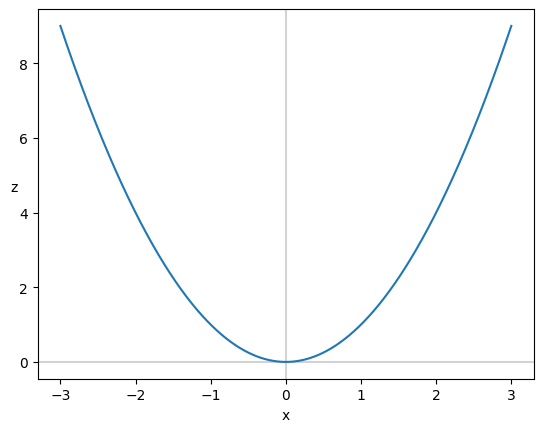

In [5]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

To determine the slope of $z$ w.r.t. $x$ at a given point along the curve, we can use the partial derivative from the slides: $$ \frac{\partial z}{\partial x} = 2x$$

In [6]:
def delz_delx(my_x, my_y):  # y isn't relevant for *this* partial derivative; it often would be
  return 2*my_x

In [7]:
# Let's study the slope at 5 specific points
x_samples = [-2, -1, 0, 1, 2, 3]

# Assign specific color to those 5 points
colors = ['red', 'orange', 'green', 'blue', 'purple', 'black']

In [8]:
def point_and_tangent_wrt_x(my_xs, my_x, my_y, my_f, fprime, col):
  
  my_z = my_f(my_x, my_y) # z = f(x, y)
  plt.scatter(my_x, my_z, c=col, zorder=3)

  tangent_m = fprime(my_x, my_y)  # Slope is partial derivative of f(x, y) w.r.t x
  tangent_b = my_z - tangent_m*my_x # Line is z = mx + b, so b = z - mx
  tangent_line = tangent_m*my_xs + tangent_b

  plt.plot(my_xs, tangent_line, c=col, linestyle='dashed', linewidth=0.7, zorder=3)


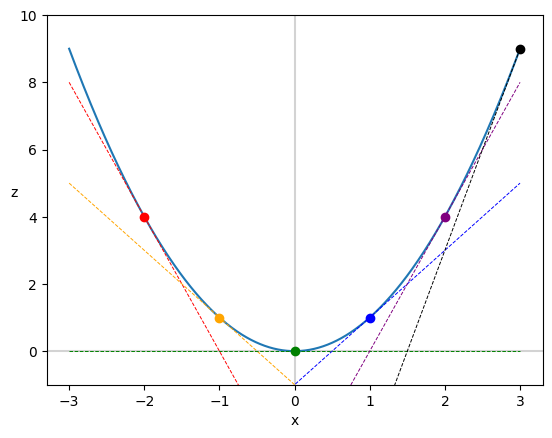

In [9]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
  point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim([-1, 10])
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

Thereby visually demonstrating $\frac{\partial z}{\partial x} = 2x$. 

That is, the slope of $z$ along the $x$ axis is *twice* the $x$ value. 

Now let's plot $z$ with respect to $y$ by varying $y$...

In [10]:
ys = np.linspace(-3, 3, 1000)

...while holding $x$ constant (e.g., at $x$ = 0): 

In [11]:
zs_wrt_y = f(0, ys)

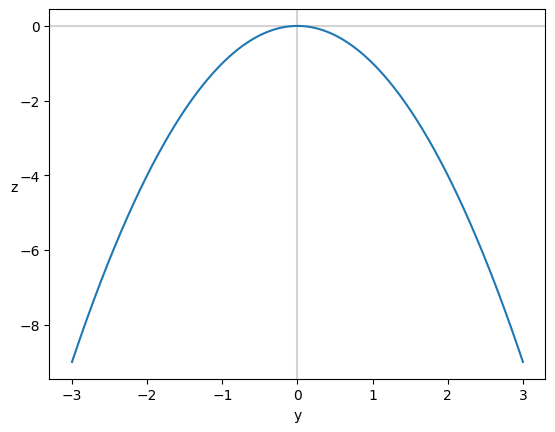

In [12]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

As in the slides, the partial derivative of $z$ w.r.t $y$ happens to be independent of $x$ (just as we observed $x$ is independent of $y$ above), so while $z$ varies as a function of both $x$ and $y$, the slope of $z$ w.r.t $y$ is the same no matter what $x$ is: $$ \frac{\partial z}{\partial y} = -2y $$

So for example, holding $x$ constant at 2 instead of 0 increases $z$, but has no impact whatsoever on the slope of $z$ w.r.t. $y$: 

In [13]:
zs_wrt_y = f(2, ys)

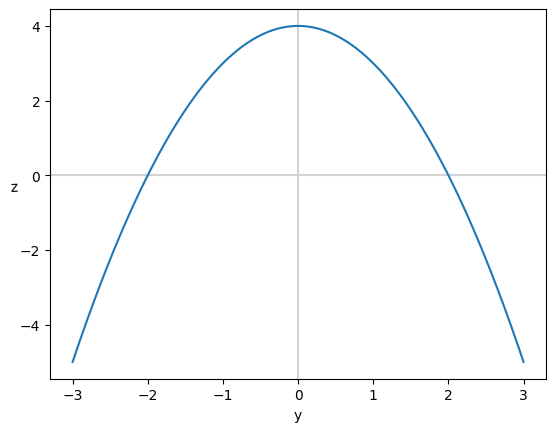

In [14]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=3)
_ = ax.plot(ys, zs_wrt_y)

In [15]:
def delz_dely(my_x, my_y):
  return -2*my_y

In [16]:
y_samples = [-2, -1, 0, 1, 2]

In [17]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col):  # changed my_xs to my_ys

  my_z = my_f (my_x, my_y)
  plt.scatter(my_y, my_z, c=col, zorder=3)  # changde my_x to my_y

  tangent_m = fprime(my_x, my_y)
  tangent_b = my_z - tangent_m*my_y # changed my_x to my_y
  tangent_line = tangent_m*my_ys + tangent_b  # changed my_xs to my_ys

  plt.plot(my_ys, tangent_line, c=col, linestyle='dashed', linewidth=0.7, zorder=3) # changed my_xs to my_ys

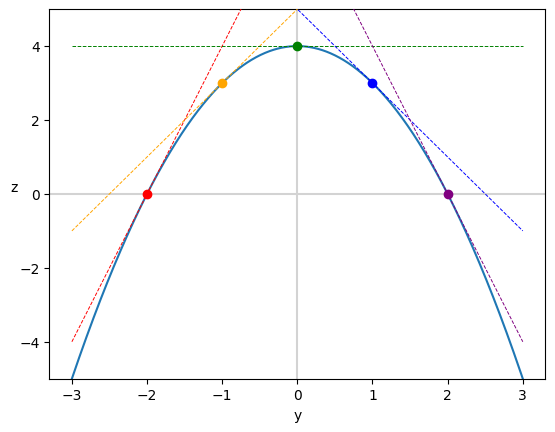

In [18]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
  point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim([-5, 5])
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

Thereby visually demonstrating $\frac{\partial z}{\partial y} = -2y$. 

That is, the slope of $z$ along the $y$ axis is *twice* the $y$ value *and inverted*, resulting in the parabolic curve opening downward.

**Exercises**: Use pencil and paper to determine: 

* The value of $z$,
* The slope of $z$ with respect to $x$, 
* And the slope of $z$ with respect to $y$

...at the points where: 

1. $x = 3, y = 0$
2. $x = 2, y = 3$
3. $x = -2, y = -3$

Determining partial derivatives by hand using rules is helpful for understanding how calculus works. In practice, however, autodiff enables us to do so more easily (especially if there are a large number of variables). For example, let's use the PyTorch automatic differentiation library to calculate the slope of $z$ with respect to both $x$ and $y$ at any given point $(x, y, z)$:

Point $x=0$, $y=0$

In [19]:
x = torch.tensor(0.).requires_grad_()
x

tensor(0., requires_grad=True)

In [20]:
y = torch.tensor(0.).requires_grad_()
y

tensor(0., requires_grad=True)

In [21]:
z = f(x, y) # Forward pass
z

tensor(0., grad_fn=<SubBackward0>)

In [22]:
z.backward()  #Autodiff

As we already knew from our exercises above, the slope of the point (0, 0, 0) is zero with respect to both the $x$ and $y$ axes: 

In [23]:
x.grad  # Slope of z w.r.t x

tensor(0.)

In [24]:
y.grad  # Slope of z w.r.t y

tensor(-0.)

**Exercise-1**: $x=3$, $y=0$

In [25]:
x = torch.tensor(3.).requires_grad_()
x

tensor(3., requires_grad=True)

In [26]:
y = torch.tensor(0.).requires_grad_()
y

tensor(0., requires_grad=True)

In [27]:
z = f(x, y) # Forward Pass
z

tensor(9., grad_fn=<SubBackward0>)

In [28]:
z.backward()  #Autodiff

In [29]:
# Slope of z w.r.t x
x.grad

tensor(6.)

In [30]:
# Slope of z w.r.t y
y.grad

tensor(-0.)

**Exercise-2**: $x=2$, $y=3$

In [31]:
x = torch.tensor(2.).requires_grad_()
x

tensor(2., requires_grad=True)

In [32]:
y = torch.tensor(3.).requires_grad_()
y

tensor(3., requires_grad=True)

In [33]:
z = f(x, y)
z

tensor(-5., grad_fn=<SubBackward0>)

In [34]:
z.backward()  #Forward Pass

In [35]:
#Slope of z w.r.t x
x.grad

tensor(4.)

In [36]:
#Slope of z w.r.t y
y.grad

tensor(-6.)

**Exercise-3**: $x=-2$, $y=-3$

In [37]:
x = torch.tensor(-2.).requires_grad_()
x

tensor(-2., requires_grad=True)

In [38]:
y = torch.tensor(-3.).requires_grad_()
y

tensor(-3., requires_grad=True)

In [39]:
z = f(x, y)
z

tensor(-5., grad_fn=<SubBackward0>)

In [40]:
z.backward()  #Forward Pass

In [41]:
#Slope of z w.r.t x
x.grad

tensor(-4.)

In [42]:
#Slope of z w.r.t y
y.grad

tensor(6.)

####Exercise with Tensorflow

**Exercise-0**: $x=0$, $y=0$

In [43]:
x = tf.Variable(0, dtype=tf.float32)
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [44]:
y = tf.Variable(0, dtype=tf.float32)
y

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [45]:
with tf.GradientTape() as t:
  z = f(x, y)

In [46]:
grads = t.gradient(z, [x, y])

In [47]:
grads

[<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.0>]

**Exercise-2**: $x=3$, $y=0$

In [48]:
x = tf.Variable(3, dtype=tf.float32)
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [49]:
y = tf.Variable(0, dtype=tf.float32)
y

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>

In [50]:
with tf.GradientTape() as t:
  z = f(x, y)

grads = t.gradient(z, [x, y])
grads

[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.0>]

**Exercise-3**: $x=2$, $y=3$

In [51]:
x = tf.Variable(2, dtype=tf.float32)
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>

In [52]:
y = tf.Variable(3, dtype=tf.float32)
y

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [53]:
with tf.GradientTape() as t:
  z = f(x, y)
grads = t.gradient(z, [x, y])
grads

[<tf.Tensor: shape=(), dtype=float32, numpy=4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-6.0>]

**Exercise-4**: $x=-2$, $y=-3$

In [54]:
x = tf.Variable(-2, dtype=tf.float32)
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-2.0>

In [55]:
y = tf.Variable(-3, dtype=tf.float32)
y

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-3.0>

In [56]:
with tf.GradientTape() as t:
  z = f(x, y)
grads = t.gradient(z, [x, y])
grads

[<tf.Tensor: shape=(), dtype=float32, numpy=-4.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0>]

### Partial Derivatives of a Cylinder's Volume

The volume of a cylinder is described by $v = \pi r^2 l$ where: 

* $r$ is the radius of the cylinder
* $l$ is its length

In [57]:
def cylinder_vol(my_r, my_l):
  return math.pi * my_r**2 * my_l

In [58]:
# Let's say the radius is 3 meters
r = torch.tensor(3.).requires_grad_()
r

tensor(3., requires_grad=True)

In [59]:
# and length is 5 meters
l = torch.tensor(5.).requires_grad_()
l

tensor(5., requires_grad=True)

In [60]:
# Then volumn of cylinder is 141.4 cubic meters
v = cylinder_vol(r, l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [61]:
v.backward()  # Autodiff

In [62]:
l.grad

tensor(28.2743)

As derived (w.r.t length) on the slides: $$\frac{\partial v}{\partial l} = \pi r^2$$

In [63]:
math.pi * r**2

tensor(28.2743, grad_fn=<MulBackward0>)

This means that with $r = 3$, a change in $l$ by one unit corresponds to a change in $v$ of 28.27$\text{m}^3$. We can prove this to ourselves: 

In [64]:
cylinder_vol(3, 6)

169.64600329384882

In [65]:
# Difference b/w two volumns is 28.2743
cylinder_vol(3,6) - cylinder_vol(3, 5)

28.274333882308127

In [66]:
cylinder_vol(3, 7) - cylinder_vol(3, 6)

28.274333882308156

For changes in $v$ with respect to $r$ we have the following from the slides: $$\frac{\partial v}{\partial r} = 2 \pi r l$$

In [67]:
r.grad

tensor(94.2478)

In [68]:
2 * math.pi * 3 * 5

94.24777960769379

$r$ is included in the partial derivative so adjusting it affects the scale of its impact on $v$. Although it's our first example in this notebook, it is typical in calculus for the derivative only to apply at an infinitesimally small $\Delta r$. The smaller the $\Delta r$, the closer to the true $\frac{\partial v}{\partial r}$. E.g., at $\Delta r = 1 \times 10^{-6}$:

In [69]:
delta =  1e-6

(cylinder_vol(3 + delta, 5) - cylinder_vol(3, 5))/delta # Dividing by delta restores scale

94.24779531741478

####With Tensorflow

In [70]:
r = tf.Variable(3, dtype=tf.float32)
l = tf.Variable(5, dtype=tf.float32)

# Then volumn of cylinder
with tf.GradientTape() as t:
  v = cylinder_vol(r, l)
grads = t.gradient(v, [r, l])
grads

[<tf.Tensor: shape=(), dtype=float32, numpy=94.24779>,
 <tf.Tensor: shape=(), dtype=float32, numpy=28.274334>]

In [71]:
v

<tf.Tensor: shape=(), dtype=float32, numpy=141.37167>

### Gradients of Cost w.r.t. Model Parameters

See the standalone notebooks: 

* [Single-Point Regression Gradient](https://github.com/darstech/ML-Foundation/blob/main/notebooks/single_point_regression_gradient.ipynb)
* [Batch Regression Gradient](https://github.com/darstech/ML-Foundation/blob/main/notebooks/batch_regression_gradient.ipynb)

## Segment 3: Integrals

In [72]:
from scipy.integrate import quad  # "quadrature" = numerical integration (as opposed to symbolic integration)

From the slides: $$ \int_1^2 \frac{x}{2} dx = \frac{3}{4} $$

In [73]:
def g(x):
  return x/2

In [77]:
quad(g, 1, 2)

#The second output of `quad` is an estimate of the absolute error of the integral, which in this case is essentially zero.

(0.75, 8.326672684688674e-15)

####Excercise

$$ \int_3^4 {2x} dx = {7} $$

In [88]:
def q1_g(x):
  return 2*x

In [90]:
quad(q1_g, 3, 4)

(7.0, 7.771561172376096e-14)

### Area Under the ROC Curve

When we don't have a function but we do have $(x, y)$ coordinates, we can use the scikit-learn library's `auc()` method, which uses a numerical approach (the [trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule)) to find the area under the curve described by the coordinates: 

In [91]:
from sklearn.metrics import auc

From the slides, the $(x, y)$ coordinates of our hot dog-detecting ROC curve are: 

* (0, 0)
* (0, 0.5)
* (0.5, 0.5)
* (0.5, 1)
* (1, 1)

In [92]:
xs = [0, 0, 0.5, 0.5, 1]
ys = [0, 0.5, 0.5, 1, 1]

In [94]:
auc(xs, ys)

0.75